# Tracking your Experiments using MLFlow

## Loading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = pd.read_csv('data/iris.csv')

In [3]:
print(iris.shape)

(150, 6)


In [4]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

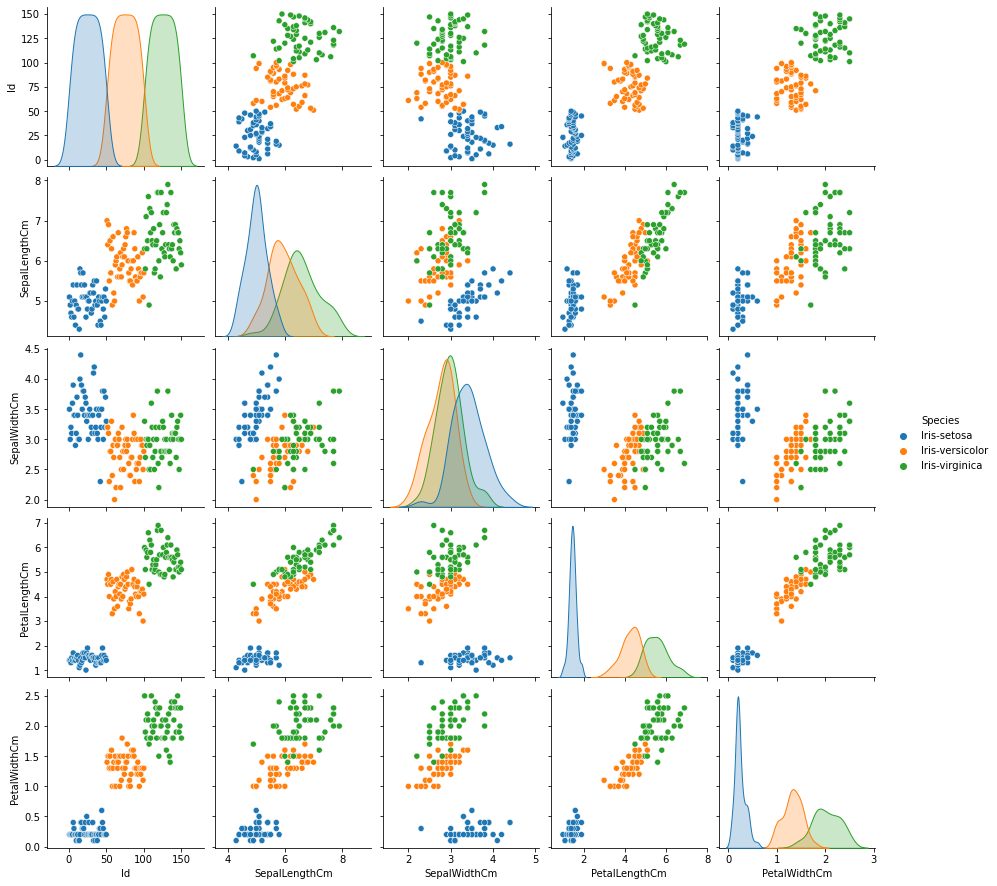

In [5]:
sns.pairplot(iris, hue = 'Species')

In [6]:
iris.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [7]:
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = iris['Species']

## Test Train Split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Data Preprocessing on Training Data

In [9]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_rescaled = pd.DataFrame(scaler.fit_transform(X_train), 
                                    columns = X_train.columns, 
                                    index = X_train.index)

X_train_rescaled.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
61        0.015440     -0.119255       0.225127      0.356382
92       -0.099845     -1.040395       0.113560     -0.028648
112       1.053005     -0.119255       0.950314      1.126441
2        -1.367980      0.341315      -1.392599     -1.312081
141       1.168290      0.111030       0.727180      1.383128

In [10]:
scaler.var_, scaler.scale_

(array([0.75240992, 0.18856824, 3.21355867, 0.60709104]),
 array([0.86741565, 0.43424445, 1.79264014, 0.77916047]))

## Preparing Test Data

In [11]:
X_test_rescaled = pd.DataFrame(scaler.transform(X_test), 
                                   columns = X_test.columns, 
                                   index = X_test.index)

X_test_rescaled.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
114      -0.099845     -0.579825       0.727180      1.511471
62        0.130725     -1.961535       0.113560     -0.285335
33       -0.445700      2.644166      -1.336815     -1.312081
107       1.629430     -0.349540       1.396583      0.741412
7        -1.022125      0.801885      -1.281032     -1.312081

## Introduction to Experiment Tracking
**Terminologies:**
> 1. Experiment  
> 2. Run  
> 3. Metadata  (i.e. Tags, Parameters, Metrics)  
> 4. Artifacts (i.e. Output files associated with experiment runs)

**What do you want to track for each Experiment Run?**
1. Training and Validation Data Used
2. Hyperparameters
3. Metrics
4. Models

**Why Track?**
> Organization
> Optimization
> Reproducibility

**Tool - MLFlow**  
MLFlow helps you to organize your experiments into runs.

**MLFlow keeps track of:**
> Tags  
> Parameters  
> Metrics  
> Models  
> Artifact  
> Source code, Start and End Time, Authors etc..

**Run below mentioned commands to install mlflow on your system:**
```
pip install mlflow
mlflow ui --backend-store-uri sqlite:///mlflow.db
```

## Introduction to MLFlow

**Step 1 - Import MLFlow**
> `import mlflow`

**Step 2 - Set the tracker and experiment**
> `mlflow.set_tracking_uri(DATABASE_URI)`  
> `mlflow.set_experiment("EXPERIMENT_NAME")`

**Step 3 - Start a experiment run**
> `with mlflow.start_run():`

**Step 4 - Logging the metadata**
> `mlflow.set_tag(KEY, VALUE)`  
> `mlflow.log_param(KEY, VALUE)`
> `mlflow.log_metric(KEY, VALUE)`

**Step 5 - Logging the model and other files (2 ways)**
> **Way 1 -** `mlflow.<FRAMEWORK>.log_model(MODEL_OBJECT, artifact_path="PATH")`  
> **Way 2 -** `mlflow.log_artifact(LOCAL_PATH, artifact_path="PATH")`

## Running the Experiment

In [12]:
import mlflow

In [13]:
mlflow.set_tracking_uri("sqlite:///mlflow.db")

mlflow.set_experiment("Iris Species Prediction")

<Experiment: artifact_location='./mlruns/1', experiment_id='1', lifecycle_stage='active', name='Iris Species Prediction', tags={}>

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn import metrics

In [15]:
from pickle import dump

dump(scaler, open('pickle_files/standard_scaler.pkl', 'wb'))

### Experiment 1 - Training KNN Classifier

In [17]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Kanav")
    mlflow.set_tag("algo", "KNN")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "data/iris.csv")
    k = 53
    mlflow.log_param("n_neighbors", k)
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_rescaled, y_train)
    y_test_pred = knn_classifier.predict(X_test_rescaled)
    acc = metrics.accuracy_score(y_test, y_test_pred)
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(knn_classifier, artifact_path="models")
    mlflow.log_artifact("pickle_files/standard_scaler.pkl")

### Experiment 2 - Training Logistic Regression

In [18]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Kanav")
    mlflow.set_tag("algo", "Logit")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "data/iris.csv")
    C = 0.1
    mlflow.log_param("C", C)
    lr_classifier = LogisticRegression(C=C)
    lr_classifier.fit(X_train_rescaled, y_train)
    y_test_pred = lr_classifier.predict(X_test_rescaled)
    acc = metrics.accuracy_score(y_test, y_test_pred)    
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(lr_classifier, artifact_path="models")
    mlflow.log_artifact("pickle_files/standard_scaler.pkl")

### Experiment 3 - Training Naive Bayes

In [19]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Kanav")
    mlflow.set_tag("algo", "GaussianNB")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "data/iris.csv")
    nb_classifier = GaussianNB()
    nb_classifier.fit(X_train_rescaled, y_train)
    y_test_pred = nb_classifier.predict(X_test_rescaled)
    acc = metrics.accuracy_score(y_test, y_test_pred)    
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(nb_classifier, artifact_path="models")
    mlflow.log_artifact("pickle_files/standard_scaler.pkl")

### Experiment 4 - Training Decision Tree

In [20]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Kanav")
    mlflow.set_tag("algo", "DecisionTree")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "data/iris.csv")
    depth = 3
    mlflow.log_param("max_depth", depth)
    dt_classifier = DecisionTreeClassifier(max_depth = depth)
    dt_classifier.fit(X_train_rescaled, y_train)
    y_test_pred = dt_classifier.predict(X_test_rescaled)
    acc = metrics.accuracy_score(y_test, y_test_pred)    
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(dt_classifier, artifact_path="models")
    mlflow.log_artifact("pickle_files/standard_scaler.pkl")

### Experiment 5 - Training Support Vector Classifier

In [22]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Kanav")
    mlflow.set_tag("algo", "SVM")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "data/iris.csv")
    C = 0.1
    mlflow.log_param("C", C)
    sv_classifier = SVC(C=C)
    sv_classifier.fit(X_train_rescaled, y_train)
    y_test_pred = sv_classifier.predict(X_test_rescaled)
    acc = metrics.accuracy_score(y_test, y_test_pred)    
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(sv_classifier, artifact_path="models")
    mlflow.log_artifact("pickle_files/standard_scaler.pkl")

### Experiment 6 - Training KNN Classifier with Hyperparameter Tuning

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
# Enabling automatic MLflow logging for scikit-learn runs
mlflow.sklearn.autolog(max_tuning_runs=None)

with mlflow.start_run():
    tuned_parameters = [{'n_neighbors':[i for i in range(1, 51)], 'p':[1, 2]}]

    clf = GridSearchCV(
        estimator=KNeighborsClassifier(), 
        param_grid=tuned_parameters, 
        scoring='accuracy',
        cv=5,
        return_train_score=True,
        verbose=1
    )
    clf.fit(X_train, y_train)
    
    # Disabling autologging
    mlflow.sklearn.autolog(disable=True)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
